In [2]:
import numpy as np
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import solar_system_ephemeris, EarthLocation, get_icrs_coordinates, PrecessedGeocentric
from astropy.coordinates import get_body_barycentric, get_body, get_moon
t = Time('0000-01-01 00:00')
min_year = -2000
max_year = 2000
delta_times = np.linspace(min_year, max_year, num=2000) * u.yr
times = t + delta_times
loc = EarthLocation.from_geodetic(0, 30)

from datetime import datetime

In [3]:
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('text.latex', preamble=r'''\usepackage{amsmath}
         \usepackage{physics}
         \usepackage{siunitx}
         ''')

%matplotlib inline

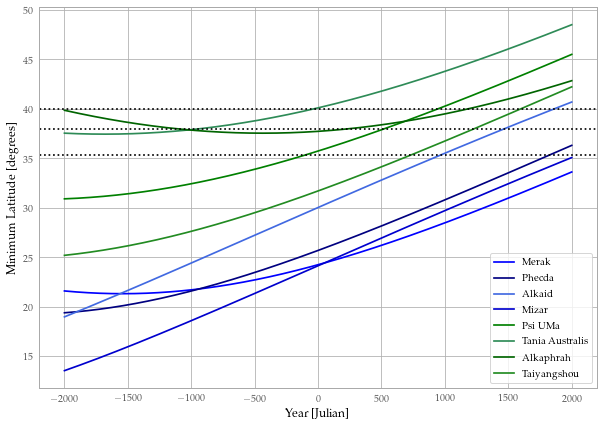

In [5]:
stars = ['Merak', 'Phecda', 'Alkaid', 'Mizar', 'Psi UMa', 'Tania Australis', 'Alkaphrah', 'Taiyangshou']
colors = ['blue', 'navy', 'royalblue', 'mediumblue', 'green', 'seagreen', 'darkgreen', 'forestgreen']
coords = [get_icrs_coordinates(star) for star in stars]

places = [('Troy', 39.95 * u.degree), ('Athens', 37.97*u.degree), ('Crete', 35.33*u.degree)]

frame = PrecessedGeocentric(equinox=times)

fig = plt.figure(figsize=(10, 7))
for c, star, color in zip(coords, stars, colors):
    plt.plot(delta_times, 90*u.degree-c.transform_to(frame).dec, label=star, c=color)

for place, latitude in places:
    plt.axhline(latitude.value, xmin=min_year, xmax=max_year, ls='dotted', c='black')

plt.legend()
plt.xlabel('Year [Julian]')
plt.ylabel('Minimum Latitude [degrees]')
plt.savefig('Ursa.pdf')

In [73]:
%%time
coords = [get_icrs_coordinates(star) for star in stars]

CPU times: user 32.3 ms, sys: 8.88 ms, total: 41.2 ms
Wall time: 1.65 s


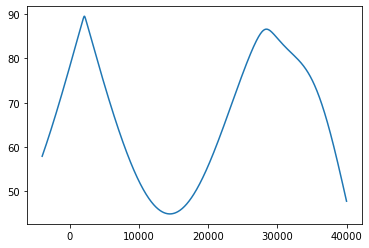

In [10]:
delta_times_2 = np.linspace(-4000, 40000, num=1000) * u.yr
times_2 = t + delta_times_2
star = get_icrs_coordinates('Polaris')
frame_2 = PrecessedGeocentric(equinox=times_2)

plt.plot(delta_times_2, star.transform_to(frame_2).dec)

In [17]:
now = Time.now() + np.linspace(50, 150, num=2000) * u.yr

np.max(90 * u.deg - star.transform_to(PrecessedGeocentric(equinox=now)).dec)

<Angle 0.6016723 deg>